# 1. First Approach to the Dataset

## 1.1. Environment Setup and Python Libraries Installation

- **Nilearn:** to facilitate the processing and visualization of neuroimaging data.
- **Matplotlib and Seaborn:** for data visualization.
- **Numpy and Pandas:** for data manipulation and analysis.

In [1]:
!pip install nilearn numpy pandas matplotlib seaborn bayesian-optimization

## 1.2. Data Loading

We established the file path using the os library and loaded the downloaded ".1D" files using numpy.

In [2]:
import nilearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

"""
Las siguientes líneas de código deben modificarse para correr desde un contenedor Docker
"""

# Ruta de la carpeta actual (donde está el notebook)
current_folder = os.getcwd()

parent_folder = os.path.dirname(current_folder)

# Ruta relativa al archivo .nii.gz
relative_path = r'Dataset_ROIs_AAL_CCS_filt_noglobal/Caltech_0051456_rois_aal.1D'

# Construir la ruta completa usando os.path.join
file_path = os.path.join(parent_folder, relative_path)

time_series_data = np.loadtxt(file_path)

# Display the shape of the loaded data
print("Shape of the loaded data array:", time_series_data.shape)

print(time_series_data)


Shape of the loaded data array: (145, 116)
[[7039.58496094 9013.60742188 5527.58203125 ... 3546.25
  5282.50537109 6146.91308594]
 [7039.40673828 9013.36425781 5527.59570312 ... 3548.40087891
  5283.90478516 6146.7265625 ]
 [7036.66455078 9009.55957031 5528.86572266 ... 3544.45043945
  5278.00195312 6150.76220703]
 ...
 [7031.11132812 9004.52148438 5521.82324219 ... 3634.96923828
  5378.97851562 6153.30126953]
 [7040.75390625 9015.99902344 5522.64550781 ... 3599.42260742
  5329.28222656 6142.60205078]
 [7049.0234375  9026.19921875 5526.52880859 ... 3525.44091797
  5263.59960938 6146.12597656]]


## 1.3. Visualize the DataWe can visualize the rs-fMRI signal of on subject to get an initial understanding of the data.

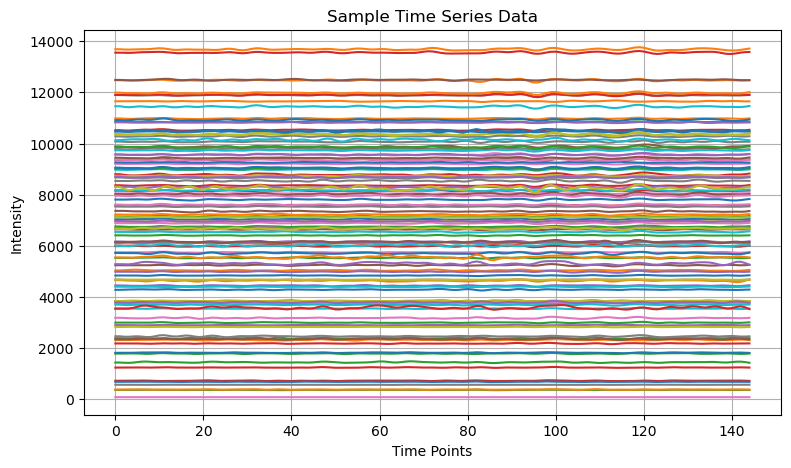

In [3]:
# Plotting the time series data
plt.figure(figsize=(9, 5))
plt.plot(time_series_data)
plt.xlabel('Time Points')
plt.ylabel('Intensity')
plt.title('Sample Time Series Data')
plt.grid(True)
plt.show()

## 1.3.1 A look at the AAL Atlas used in this brain parcellation:

/home/agustinnr/nilearn_data/aal_SPM12/aal/atlas/AAL.nii
/home/agustinnr/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale122.nii.gz
116
Atlas labels: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'C

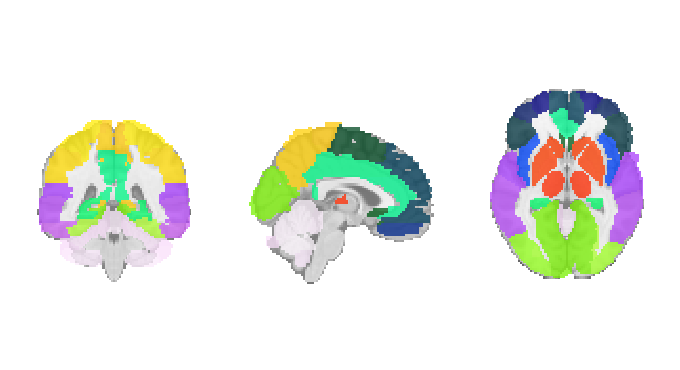

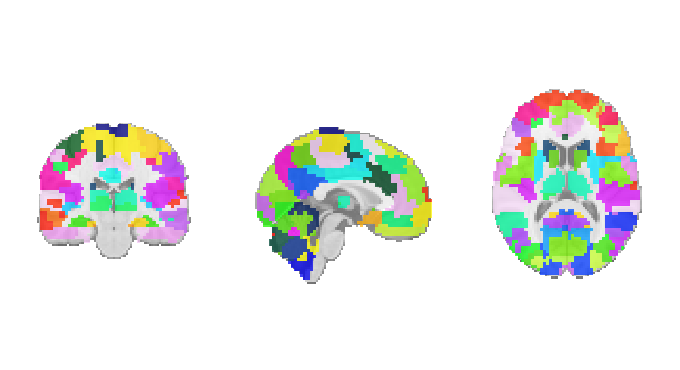

In [4]:
from nilearn import datasets
from nilearn import plotting
# Load the atlas
atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas.maps
atlas_labels = atlas.labels
atlas_indices = atlas.indices
atlas_description = atlas.description  
print(atlas_filename)
plotting.plot_roi(atlas_filename, draw_cross=False, annotate=False, alpha=0.75)

parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
aal_atlas_filename = parcellations.scale122
#possible scales:007,012,020,064,122,197,325,444
print(aal_atlas_filename)

plotting.plot_roi(aal_atlas_filename, draw_cross=False, annotate=False, alpha=0.75)
print(len(atlas_labels))
print("Atlas labels:", atlas_labels)

print(atlas_labels[95:])

### Otras pruebas

/home/agustinnr/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


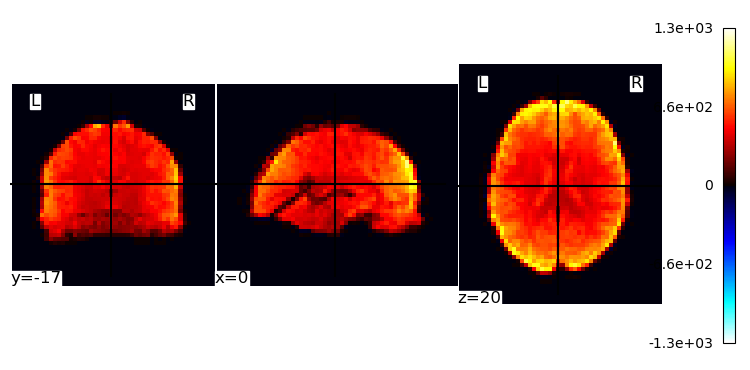

In [5]:
from nilearn import image
#Averiguar como hacer esto con nuestras imagenes ReHo.Sería la media de todas las imagenes de cada punto de vista del sujeto 1.
data = datasets.fetch_development_fmri()
fmri_filenames = data.func[0]
print(fmri_filenames)
averaged_img = image.mean_img(fmri_filenames)
plotting.plot_stat_map(averaged_img)

### Misma imagen pero interactiva:

/home/agustinnr/miniconda3/lib/python3.12/site-packages/nilearn/plotting/html_stat_map.py:112: UserWarning: Threshold given was 1e-06, but the data has no values below -116.0191650390625. 
  warnings.warn(
/home/agustinnr/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



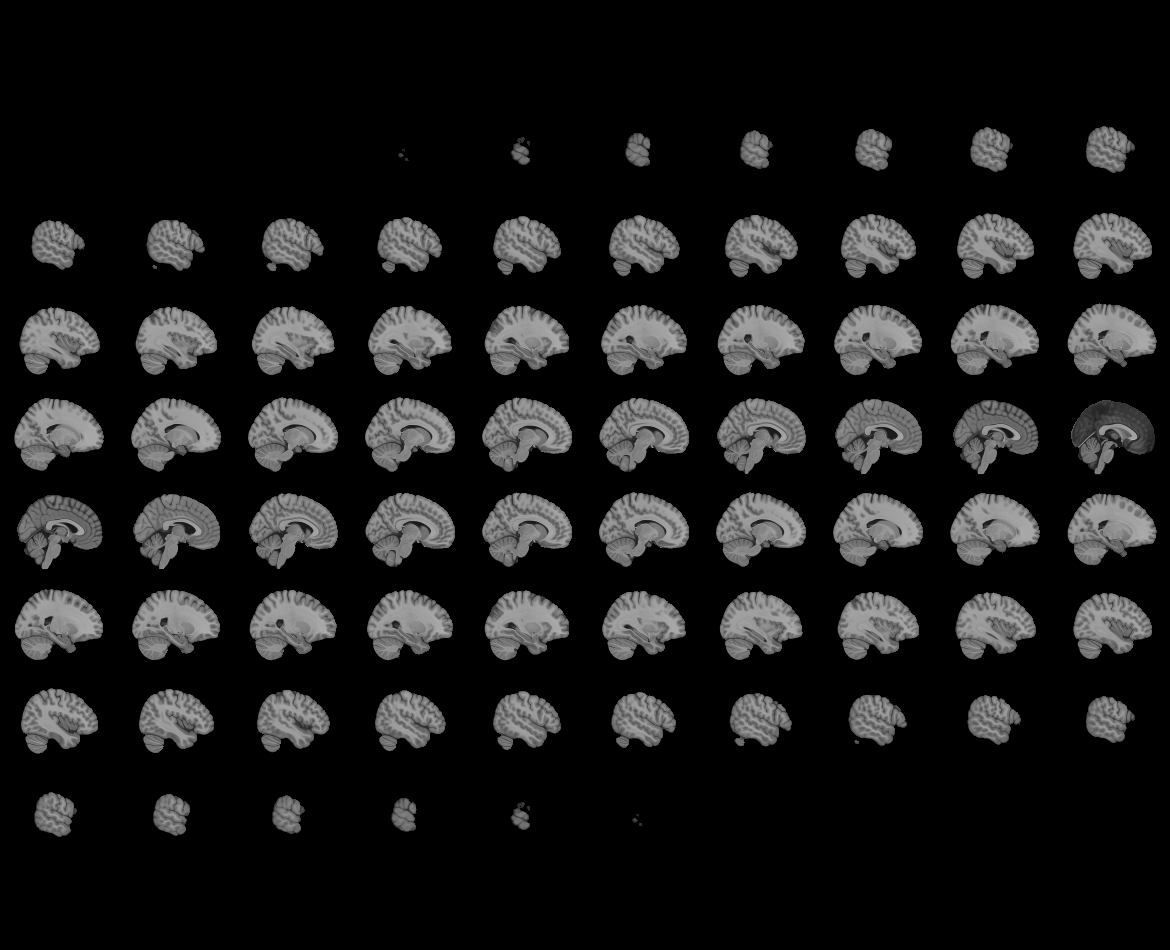
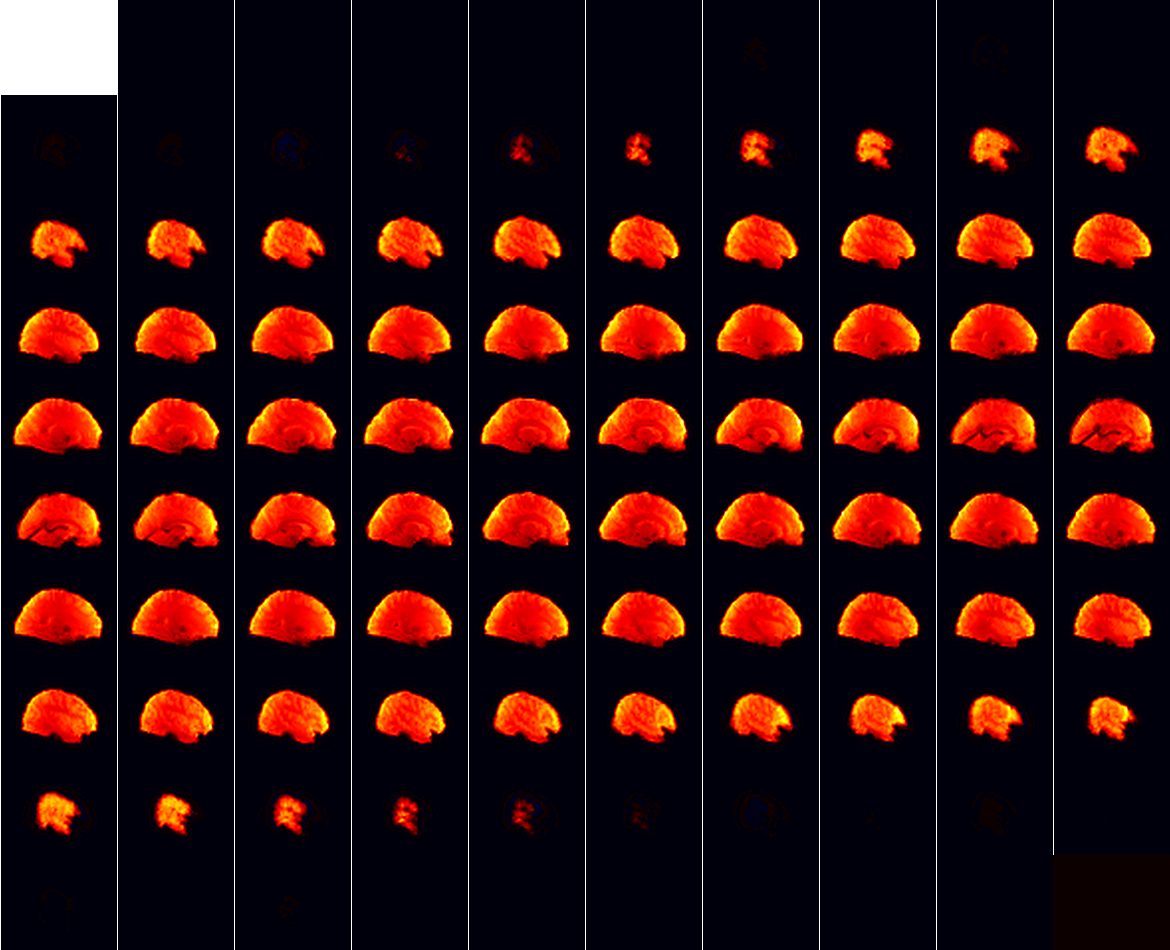

In [6]:
plotting.view_img(averaged_img)

# 1.4. Individual Correlation Matrix

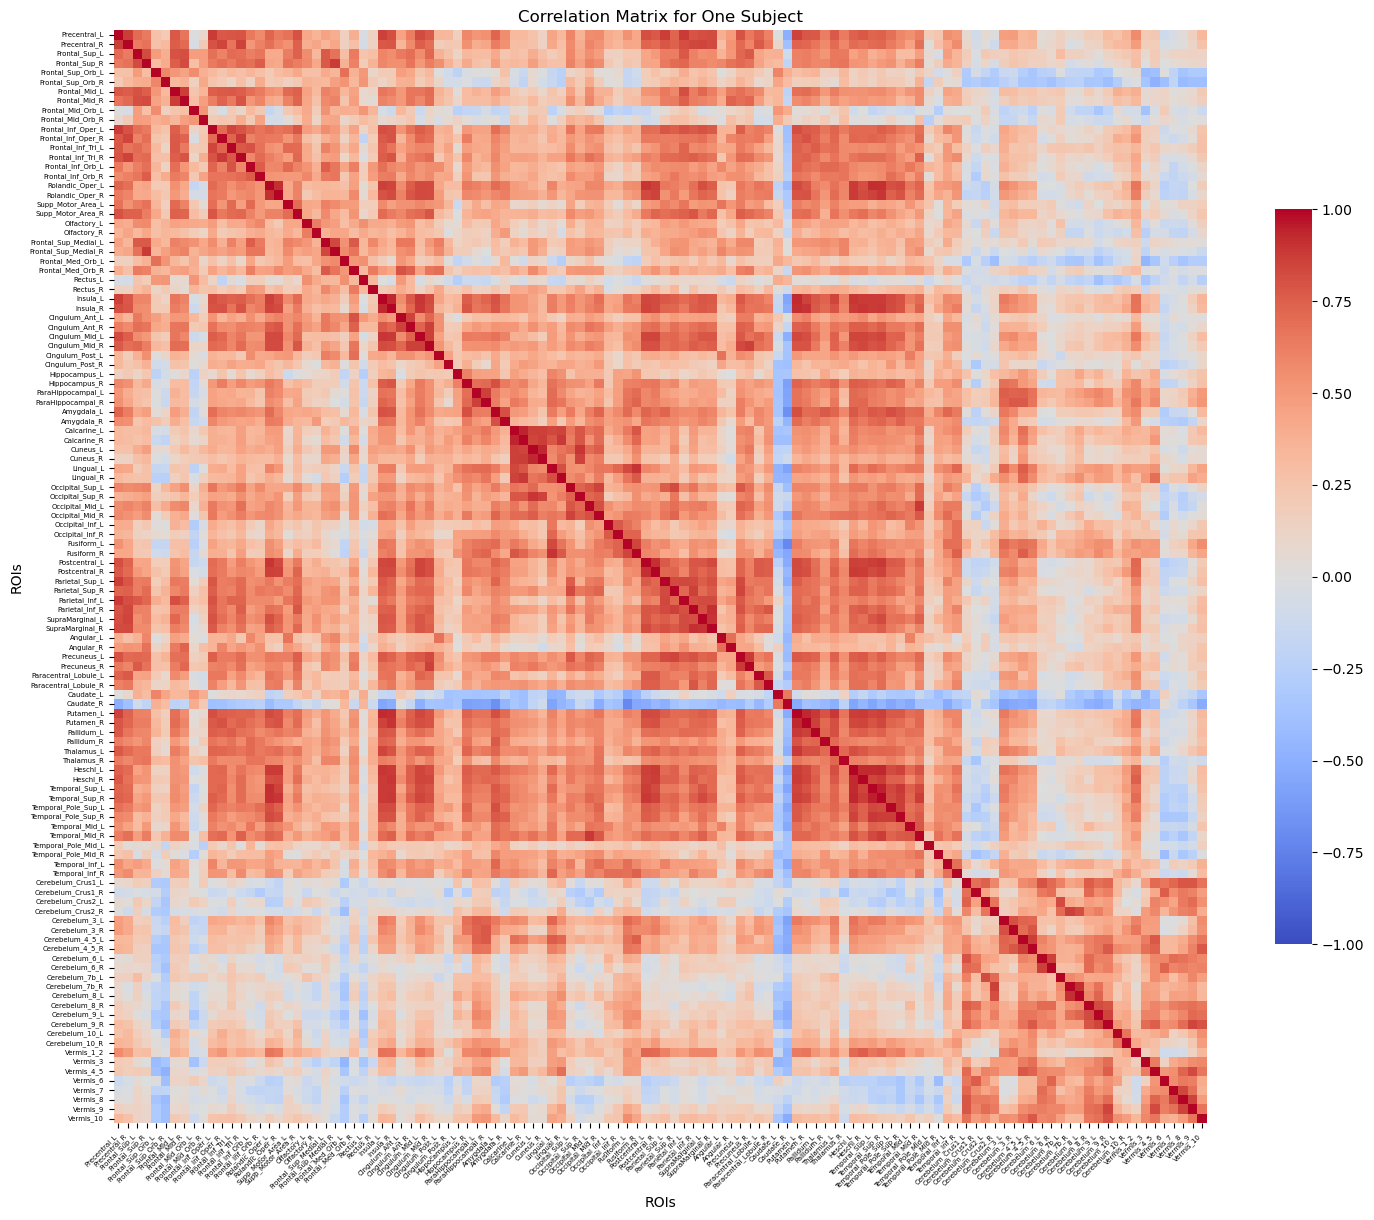

In [7]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(time_series_data.T)  # Transpose so that rows represent different ROIs

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=atlas_labels, yticklabels=atlas_labels, square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for One Subject')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=5)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=5)
plt.tight_layout()
plt.show()

# 1.5. Cleaning the Individual Correlation Matrix

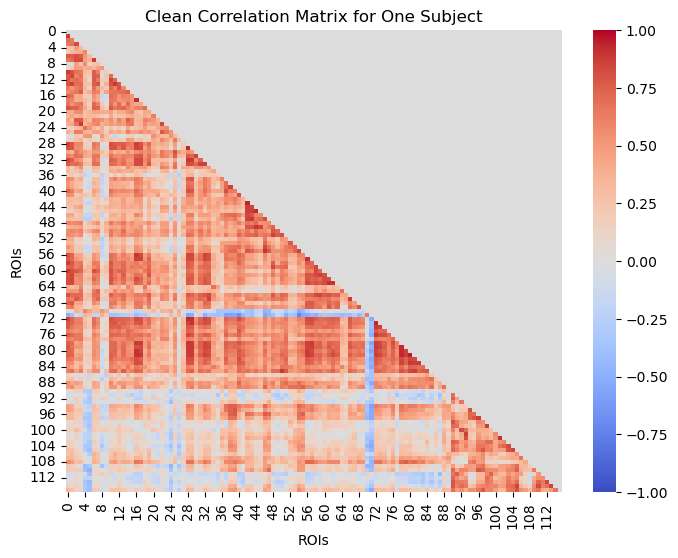

In [8]:
#Plotting just the lower triangule of the correlation matrix:
lower_triangle = np.tril(correlation_matrix, k=-1)

plt.figure(figsize=(8, 6))
sns.heatmap(lower_triangle, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Clean Correlation Matrix for One Subject')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


# 1.6. Vectorizing the Cleaned Individual Correlation Matrix

#### This method ordered rows-wise from the lower triangular matrix. Specifically, the order follows:

- All elements from the first row below the diagonal.
- All elements from the second row below the diagonal.
- And so on, up to the last row.

In [9]:
lower_triangle_indices = np.tril_indices(correlation_matrix.shape[0], k=-1)

vectorized_lower_triangle = lower_triangle[lower_triangle_indices]

print("Vector with the elements of the lower half of the one subject correlation matrix (without the diagonal):\n", vectorized_lower_triangle)


Vector with the elements of the lower half of the one subject correlation matrix (without the diagonal):
 [0.87438559 0.70989999 0.63884253 ... 0.37195642 0.49164892 0.66716983]


# 1.7. Checking the Quality of the Vector

In [10]:
vector = vectorized_lower_triangle
print(f"Data type: {vector.dtype}")
print(f"Min value: {np.min(vector)}")
print(f"Max value: {np.max(vector)}")
print(f"Mean value: {np.mean(vector)}")
print(f"Standard deviation: {np.std(vector)}")
print(f"Lenght: {len(vector)}")
# Check for NaNs
print(f"Any NaNs in data: {np.isnan(vector).any()}")
print("---"*8)
print("First 7 values of the vector:")
print(vector[:6])

Data type: float64
Min value: -0.7159769020698279
Max value: 0.9488359071435615
Mean value: 0.32107573075109536
Standard deviation: 0.28906254610274096
Lenght: 6670
Any NaNs in data: False
------------------------
First 7 values of the vector:
[0.87438559 0.70989999 0.63884253 0.64194977 0.67877505 0.82084473]


# 2. Initial DataFrame

## 2.1. Loop to create the initial DataFrame

In [11]:
from IPython.display import display
# Obtener la ruta del directorio actual y el directorio padre
current_folder = os.getcwd()
parent_folder = os.path.dirname(current_folder)

# Definir el archivo CSV y su ruta
original_csv_file = 'Phenotypic_V1_0b_preprocessed1.csv'
original_csv_path = os.path.join(current_folder, original_csv_file)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(original_csv_path, sep=";")

# Nombres de las ROIs del atlas AAL (asegúrate de que 'atlas.labels' esté definido correctamente en tu código)
roi_names = atlas.labels

# Inicializar una lista para almacenar los vectores del triángulo inferior de las matrices de correlación
vectorized_data = []

# Inicializar contadores
count_valid = 0
count_stddev_error = 0
count_file_error = 0

# Recorrer cada fila del DataFrame y calcular la matriz de correlación, eliminando las filas donde no existe el archivo
for index, row in df.iterrows():
    file_id_value = row['FILE_ID']
    relative_path = f'Dataset_ROIs_AAL_CCS_filt_noglobal/{file_id_value}_rois_aal.1D'
    file_path = os.path.join(parent_folder, relative_path)
    
    # Verificar si el archivo existe
    if os.path.exists(file_path):
        try:
            # Cargar los datos de la serie temporal
            time_series_data = np.loadtxt(file_path)
            
            # Verificar que no haya series con desviación estándar cero
            if np.any(np.std(time_series_data, axis=0) == 0):
                raise ValueError("Desviación estándar cero encontrada en alguna serie temporal")
                
            
            # Calcular el vector del triángulo inferior de la matriz de correlación
            correlation_matrix = np.corrcoef(time_series_data.T)
            lower_triangle_indices = np.tril_indices(correlation_matrix.shape[0], k=-1)
            vectorized_lower_triangle = correlation_matrix[lower_triangle_indices]
            vectorized_data.append(vectorized_lower_triangle)
            count_valid += 1
        except Exception as e:
            #print(f"Error procesando el archivo: {file_path}\n{e}")
            df.drop(index, inplace=True)
            count_stddev_error += 1
    else:
        # Eliminar la fila si el archivo no existe
        df.drop(index, inplace=True)
        count_file_error += 1

# Crear un DataFrame con los vectores del triángulo inferior
vectorized_df = pd.DataFrame(vectorized_data)
#indices_row = ["Index"] + list(range(1, len(vectorized_df.columns) + 1))
#vectorized_df.loc[-1] = indices_row  # Insertar la fila al inicio
#vectorized_df.index = vectorized_df.index + 1  # Desplazar el índice

# Guardar el DataFrame `df` actualizado en el archivo CSV original
#df = df.set_axis(df.iloc[0], axis=1)
df = df.drop(df.columns[[0, 1]], axis=1)
pheno_df = df.set_index(df.columns[0])

clean_csv_path = os.path.join(current_folder, 'Phenotypic_simplified_clean.csv')
pheno_df.to_csv(clean_csv_path, sep=",", index=False)

# Imprimir la longitud del vectorizado para el diagnóstico
if vectorized_data:
    print(f"vectorized_lower_triangle len: {len(vectorized_lower_triangle)}")

print(f"Files not found: {count_file_error}")
print(f"Std Dev Error: {count_stddev_error}")
    

# Guardar el DataFrame en un archivo CSV
output_csv_path = os.path.join(current_folder, 'vectorized_correlations.csv')
vectorized_df.to_csv(output_csv_path, index=False)

# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

# Mostrar el DataFrame en Jupyter Notebook
display(vectorized_df)
display(pheno_df)

vectorized_lower_triangle len: 6670
Files not found: 228
Std Dev Error: 64


,0,1,2,3,4,5,6,7,8,9,...,6660,6661,6662,6663,6664,6665,6666,6667,6668,6669
0,0.870813,0.805070,0.693176,0.778252,0.748457,0.844588,0.807095,0.737196,0.855809,0.769672,...,0.676658,0.222927,0.282437,-0.273149,0.228345,0.078729,0.017100,0.067529,-0.249568,-0.143400
1,0.898271,0.530014,0.458091,0.251550,0.346688,0.300349,0.185360,0.055388,0.668472,0.039961,...,0.367960,0.201114,0.215894,0.395081,0.178194,0.047404,0.250613,0.364111,0.231605,0.175845
2,0.694720,0.617756,0.640611,0.538903,0.731939,0.856895,0.400831,0.373279,0.515696,0.491006,...,0.439248,0.298834,0.663160,0.494288,0.250436,0.096148,-0.088067,0.275448,-0.038101,0.146421
3,0.795809,0.704917,0.662008,0.580074,0.641586,0.697295,0.594052,0.528248,0.766270,0.575263,...,0.421430,0.457157,0.492290,0.206852,0.149637,0.104935,0.275394,0.167705,0.082875,0.731423
4,0.698046,0.339043,0.658891,0.145301,0.412934,0.695916,0.194750,0.218813,0.408388,0.120781,...,0.462363,0.297826,0.121002,0.113757,0.132499,0.083765,0.192908,-0.120131,0.284368,0.443524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.608603,0.841734,0.548407,0.598860,0.691022,0.756287,0.512149,0.432697,0.604457,0.424698,...,-0.156660,0.296770,0.439990,0.265809,-0.452533,0.323737,0.301574,0.438263,0.204875,0.497366
816,0.781145,0.673924,0.553285,0.574009,0.709194,0.837303,0.436674,0.519944,0.494364,0.510137,...,0.703214,0.252008,0.406716,0.572137,-0.124384,-0.132317,0.308735,0.288378,0.383258,0.835765
817,0.447159,0.478067,0.250900,0.076704,0.373822,0.664480,0.199131,0.068500,0.126183,0.174924,...,0.006474,0.251367,0.698613,0.489151,0.408260,0.340335,0.610982,0.521387,0.231358,0.410172
818,0.423467,0.291398,0.000689,-0.106823,0.309935,0.306685,0.121247,0.081313,0.346079,0.270052,...,0.253509,0.151337,-0.108152,0.155436,-0.003550,0.074924,-0.230657,-0.037307,0.032230,0.110144


,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
SUB_ID,,,,,,,,,,,,,,,,,,,,,
50005,4,50005,PITT,Pitt_0050005,1,1,13.73,2,R,NaN,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0.0
50006,5,50006,PITT,Pitt_0050006,1,1,13.37,1,L,NaN,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1.0
50008,7,50008,PITT,Pitt_0050008,1,1,32.45,1,R,NaN,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1.0
50009,8,50009,PITT,Pitt_0050009,1,1,33.86,1,R,NaN,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,OK,NaN,1.0
50010,9,50010,PITT,Pitt_0050010,1,1,35.20,1,L,NaN,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51574,1099,51574,SBL,SBL_0051574,1,2,30.00,1,NaN,100.0,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0.0
51576,1101,51576,SBL,SBL_0051576,1,3,31.00,1,NaN,80.0,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0.0
51581,1106,51581,SBL,SBL_0051581,1,3,64.00,1,NaN,100.0,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,OK,NaN,0.0


## 2.2. Creating the ROIs' labels combinations vector:

In [12]:
# Obtener el número de etiquetas
n_labels = len(atlas_labels)
print(n_labels)
# Crear una matriz vacía de dimensiones (n_labels x n_labels)
labels_matrix = np.empty((n_labels, n_labels), dtype=object)

# Rellenar la matriz con las combinaciones
for i in range(n_labels):
    for j in range(n_labels):
        labels_matrix[i, j] = f"{atlas_labels[i]} x {atlas_labels[j]}"

lower_triangle_labels = np.tril_indices(labels_matrix.shape[0], k=-1)
vectorized_lower_triangle_labels = labels_matrix[lower_triangle_labels]

print(vectorized_lower_triangle_labels)
print(len(vectorized_lower_triangle_labels))

116
['Precentral_R x Precentral_L' 'Frontal_Sup_L x Precentral_L'
 'Frontal_Sup_L x Precentral_R' ... 'Vermis_10 x Vermis_7'
 'Vermis_10 x Vermis_8' 'Vermis_10 x Vermis_9']
6670


## 2.3. Appending the ROIs' labels combinations vector to our dataframe:

In [13]:
'''
if not any((vectorized_df.values == vectorized_lower_triangle_labels).all(1)):
    # Insertar el vectorized_lower_triangle_labels como la primera fila
    first_row_df = pd.DataFrame([vectorized_lower_triangle_labels], columns=vectorized_df.columns)
    vectorized_df = pd.concat([first_row_df, vectorized_df], ignore_index=True)

display(first_row_df)

display(vectorized_df)
'''

'\nif not any((vectorized_df.values == vectorized_lower_triangle_labels).all(1)):\n    # Insertar el vectorized_lower_triangle_labels como la primera fila\n    first_row_df = pd.DataFrame([vectorized_lower_triangle_labels], columns=vectorized_df.columns)\n    vectorized_df = pd.concat([first_row_df, vectorized_df], ignore_index=True)\n\ndisplay(first_row_df)\n\ndisplay(vectorized_df)\n'

## 2.4. Setting the ROIs' labels as horizontal index:

In [14]:
'''
vectorized_df = vectorized_df.set_axis(vectorized_df.iloc[0], axis=1)

# Eliminar la primera fila después de establecerla como índice
vectorized_df = vectorized_df.drop(vectorized_df.index[0])
display(vectorized_df)
'''

'\nvectorized_df = vectorized_df.set_axis(vectorized_df.iloc[0], axis=1)\n\n# Eliminar la primera fila después de establecerla como índice\nvectorized_df = vectorized_df.drop(vectorized_df.index[0])\ndisplay(vectorized_df)\n'

# 3. PCA - Principal Components Analysis:

Variance explained by each component: [0.32096622 0.03237815 0.02141749 0.01963078 0.01661228 0.01366842
 0.0130285  0.01097677 0.00973369 0.00943232 0.00887931 0.00812948
 0.00768357 0.0075287  0.00714266 0.00666542 0.00642997 0.00596111
 0.00587437 0.00576364 0.00560687 0.00534265 0.00513933 0.00508731
 0.00492802 0.00468428 0.00450211 0.00426254 0.00419108 0.00416872
 0.00403119 0.00392415 0.00388754 0.00370317 0.00365059 0.00353918
 0.00349292 0.00339418 0.00337083 0.00325181 0.00321825 0.00318552
 0.003125   0.00307985 0.0030164  0.00291327 0.00288437 0.0028197
 0.00277788 0.00273015 0.00270667 0.00266201 0.00263401 0.00255677
 0.00252337 0.00248457 0.00246655 0.00243154 0.00236755 0.00231618
 0.00227745 0.0022408  0.00223279 0.00218247 0.00213393 0.00211319
 0.00210164 0.0020661  0.00203968 0.00203397 0.00199808 0.00195573
 0.00193185 0.00190717 0.00190391 0.00183784 0.00183504 0.00182886
 0.0017918  0.00178259 0.00176789 0.00175534 0.0017058  0.00169615
 0.00168065 0.00166903 0.

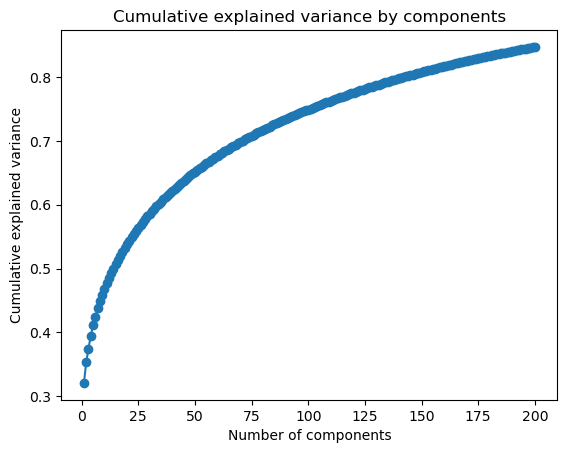

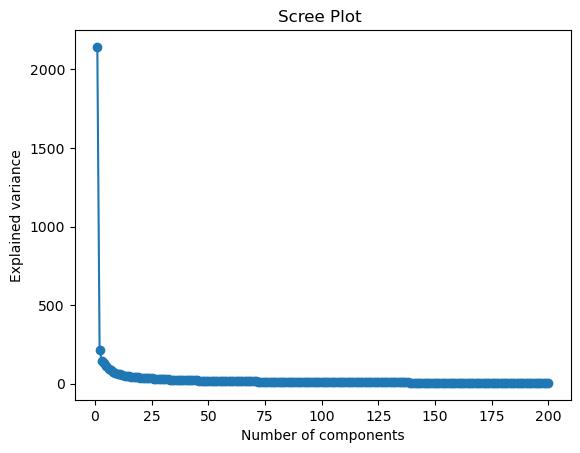

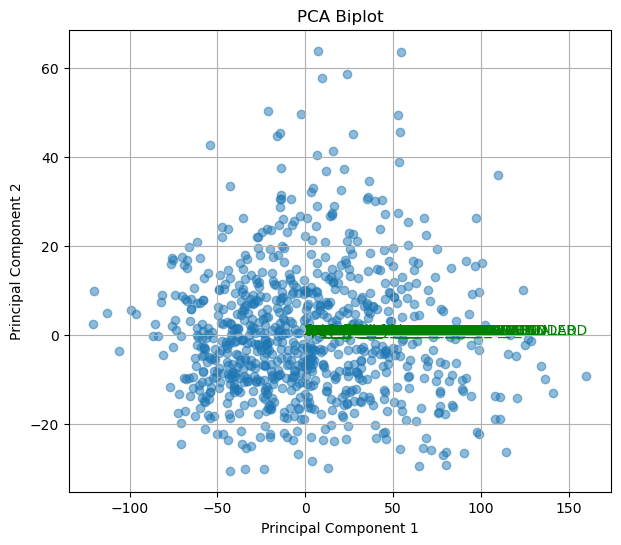

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(vectorized_df)

n_components = 200  # por ejemplo, elige el número que consideres adecuado

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
print("Variance explained by each component:", explained_variance)

# Grafica la varianza explicada acumulada para ayudarte a decidir el número de componentes
plt.plot(range(1, n_components + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance by components')
plt.show()

#Scree Plot 
plt.plot(range(1, n_components + 1), pca.explained_variance_, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree Plot ')
plt.show()

#Biplot
pca_biplot = PCA(n_components=2)  # Utiliza solo 2 componentes principales para el biplot
principal_components = pca_biplot.fit_transform(scaled_data)

pca_components_df = pd.DataFrame(principal_components, columns=['Component 1', 'Component 2'])

plt.figure(figsize=(7, 6))
plt.scatter(pca_components_df['Component 1'], pca_components_df['Component 2'], alpha=0.5)
for i, feature in enumerate(df.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15, feature, color='g')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.grid()
plt.show()

# XGBoost

In [16]:
!pip install xgboost

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization

X = vectorized_df
pheno_df['DX_GROUP'] = pheno_df['DX_GROUP'].replace(2, 0)
y = pheno_df['DX_GROUP']
display(y)

value_counts = y.value_counts()
print("Value Counts:")
print(value_counts)

SUB_ID
50005    1
50006    1
50008    1
50009    1
50010    1
        ..
51574    1
51576    1
51581    1
51606    1
51607    1
Name: DX_GROUP, Length: 820, dtype: int64

Value Counts:
DX_GROUP
0    445
1    375
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Define the objective function for Bayesian optimization
def xgb_cv(max_depth, learning_rate, n_estimators):
    params = {
        'max_depth': int(max_depth),
        'learning_rate': learning_rate,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss'
    }
    cv_results = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=int(n_estimators),
        nfold=5,
        metrics='logloss',
        early_stopping_rounds=10,
        as_pandas=True,
        seed=42
    )
    # Return the negative logloss (since we want to minimize logloss)
    return -cv_results['test-logloss-mean'].iloc[-1]

# Define the parameter space for Bayesian optimization
param_space = {
    'max_depth': (3, 6),
    'learning_rate': (0.05, 0.2),
    'n_estimators': (50, 100)
}

# Perform Bayesian optimization
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=param_space,
    random_state=42
)

optimizer.maximize(init_points=5, n_iter=5)

# Get the best parameters
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

print(f"Best Parameters: {best_params}")

# Train the final model with the best parameters
xgb_model = xgb.train(
    params=best_params,
    dtrain=dtrain,
    num_boost_round=best_params['n_estimators']
)

# Predict on the test set
y_pred_prob = xgb_model.predict(dtest)
y_pred = y_pred_prob.round()

y_pred_prob_train = xgb_model.predict(dtrain)
y_pred_train = y_pred_prob_train.round()

# Evaluate the accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {train_accuracy}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | -0.6738   | 0.1062    | 5.852     | 86.6      |
| 2         | -0.6746   | 0.1398    | 3.468     | 57.8      |
| 3         | -0.674    | 0.05871   | 5.599     | 80.06     |
| 4         | -0.6783   | 0.1562    | 3.062     | 98.5      |
| 5         | -0.6758   | 0.1749    | 3.637     | 59.09     |
| 6         | -0.673    | 0.1223    | 5.764     | 83.57     |
| 7         | -0.6638   | 0.05      | 3.0       | 52.77     |
| 8         | -0.6666   | 0.05      | 4.288     | 50.0      |


### Additional Metrics

In [ ]:
# Additional Metrics
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * roc_auc - 1
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Gini Coefficient: {gini}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
importance = xgb_model.get_score(importance_type='gain')

importance_indices = [int(key[0:]) for key in importance.keys()]
importance_df = pd.DataFrame({
    'Feature':[vectorized_lower_triangle_labels[idx] for idx in importance_indices],
    'Importance': list(importance.values())
})
display(importance_df)
# Ordenar las características por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Limitar a las 20 características más importantes
top_n = 20
top_features = importance_df.head(top_n)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importance')
plt.gca().invert_yaxis()  # Mostrar las características más importantes primero
plt.show()

# PCA + XGBoost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.2, random_state=42)

# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Define parameters for the XGBoost model
params = {
    'max_depth': 3,
    'learning_rate': 0.01,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Number of boosting rounds
num_round = 100

# Train the XGBoost model
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round)

# Predict on the test set
y_pred_prob = xgb_model.predict(dtest)
y_pred = y_pred_prob.round()

y_pred_prob_train = xgb_model.predict(dtrain)
y_pred_train = y_pred_prob_train.round()

# Evaluate the accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {train_accuracy}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Additional Metrics
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * roc_auc - 1
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Gini Coefficient: {gini}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=0)  # Ensure the x-ticks are horizontal
plt.yticks(rotation=0)  # Ensure the y-ticks are horizontal
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Obtener la importancia de las características
importance = xgb_model.get_score(importance_type='weight')

importance_indices = [int(key[1:]) for key in importance.keys()]
importance_df = pd.DataFrame({
    'Feature':[vectorized_lower_triangle_labels[idx] for idx in importance_indices],
    'Importance': list(importance.values())
})
display(importance_df)
# Ordenar las características por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Limitar a las 20 características más importantes
top_n = 20
top_features = importance_df.head(top_n)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importance')
plt.gca().invert_yaxis()  # Mostrar las características más importantes primero
plt.show()

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = vectorized_df
pheno_df['DX_GROUP'] = pheno_df['DX_GROUP'].replace(2, 0)
y = pheno_df['DX_GROUP']
display(y)

In [ ]:
from sklearn.preprocessing import label_binarize


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo LDA
lda = LinearDiscriminantAnalysis()

# Ajustar el modelo a los datos de entrenamiento
lda.fit(X_train, y_train)

# Predecir las clases del conjunto de prueba
y_pred = lda.predict(X_test)
y_pred_prob = lda.predict_proba(X_test)

y_pred_prob_train = lda.predict(X_train)
y_pred_train = y_pred_prob_train.round()

# Evaluate the accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {train_accuracy}')

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix:')
plt.show()

# Binarizar las etiquetas para ROC AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calcular el AUC para cada clase
auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f'ROC AUC: {auc:.2f}')

# Calcular el Gini coefficient
gini = 2 * auc - 1
print(f'Gini coefficient: {gini:.2f}')

# Calcular el reporte de clasificación
classification_rep = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(f'Classification Report:\n{classification_rep}')

roc_auc = roc_auc_score(y_test, y_pred_prob)
classification_rep = classification_report(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# PCA + LDA

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.2, random_state=42)

# Crear el modelo LDA
lda = LinearDiscriminantAnalysis()

# Ajustar el modelo a los datos de entrenamiento
lda.fit(X_train, y_train)

# Predecir las clases del conjunto de prueba
y_pred = lda.predict(X_test)
y_pred_prob = lda.predict_proba(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calcular el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['N', 'P'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Binarizar las etiquetas para ROC AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calcular el AUC para cada clase
auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f'ROC AUC: {auc:.2f}')

# Calcular el Gini coefficient
gini = 2 * auc - 1
print(f'Gini coefficient: {gini:.2f}')

# Calcular el reporte de clasificación
classification_rep = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(f'Classification Report:\n{classification_rep}')

roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Asumiendo que vectorized_df y pheno_df están previamente definidos
X = vectorized_df
pheno_df['DX_GROUP'] = pheno_df['DX_GROUP'].replace(2, 0)
y = pheno_df['DX_GROUP']

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicialización y entrenamiento del modelo de regresión logística
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]
y_pred = log_reg_model.predict(X_test)

y_pred_prob_train = log_reg_model.predict_proba(X_train)[:, 1]
y_pred_train = log_reg_model.predict(X_train)

# Evaluación de la precisión
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {train_accuracy}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Métricas adicionales
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * roc_auc - 1
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Gini Coefficient: {gini}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.show()

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
